# LYFT - Driver Lifetime Value

## Contents

* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Read and Explore all Datasets](#Read-and-Explore-all-Datasets)
* [Data Engineering](#Data-Engineering)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)
* [Question 5](#Question-5)

## Assignment
After exploring and analyzing the data, please:

**1**. Recommend a Driver's Lifetime Value (i.e., the value of a driver to Lyft over the entire projected lifetime of a driver).


**2.** What are the main factors that affect a driver's lifetime value?


**3.** What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Lyft?


**4.** Do all drivers act alike? Are there specific segments of drivers that generate more value for Lyft than the average driver?


**5.** What actionable recommendations are there for the business?


## Data Description

You'll find three CSV files attached with the following data:

### driver_ids.csv

driver_id  = Unique identifier for a driver

driver_onboard_date  = Date on which driver was on-boarded


### ride_ids.csv

driver_id  = Unique identifier for a driver

ride_id  = Unique identifier for a ride that was completed by the driver

ride_distance = Ride distance in meters

ride_duration = Ride duration in seconds

ride_prime_time  = Prime Time applied on the ride


### ride_timestamps.csv

ride_id = Unique identifier for a ride

event =  describes the type of event; this variable takes the following values:

          requested_at - passenger requested a ride
          accepted_at - driver accepted a passenger request
          arrived_at - driver arrived at pickup point
          picked_up_at - driver picked up the passenger
          dropped_off_at - driver dropped off a passenger at destination


timestamp  = Time of event


### You can assume that:

All rides in the data set occurred in San Francisco

All timestamps in the data set are in UTC

## Read and Explore all Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
driver_ids = pd.read_csv('driver_ids.csv')

ride_ids = pd.read_csv('ride_ids.csv')

ride_timestamps = pd.read_csv('ride_timestamps.csv')

In [3]:
driver_ids.head(3)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00


In [4]:
ride_ids.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0


In [5]:
ride_timestamps.head(3)

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31


In [6]:
driver_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   driver_id            937 non-null    object
 1   driver_onboard_date  937 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [7]:
ride_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [8]:
ride_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ride_id    970405 non-null  object
 1   event      970405 non-null  object
 2   timestamp  970404 non-null  object
dtypes: object(3)
memory usage: 22.2+ MB


In [9]:
print('Shape of data : ', driver_ids.shape)
print('Unique of driver id : ', len(driver_ids['driver_id'].unique()))
print('Min date : ',driver_ids['driver_onboard_date'].min())
print('Max date : ',driver_ids['driver_onboard_date'].max())

Shape of data :  (937, 2)
Unique of driver id :  937
Min date :  2016-03-28 00:00:00
Max date :  2016-05-15 00:00:00


In [10]:
print('Shape of data : ', ride_ids.shape)
print('Unique of driver id : ', len(ride_ids['driver_id'].unique()))
print('Unique of ride id : ', len(ride_ids['ride_id'].unique()))
ride_ids.describe()

Shape of data :  (193502, 5)
Unique of driver id :  937
Unique of ride id :  193502


,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


In [11]:
print('Shape of data : ', ride_timestamps.shape)
print('Unique of ride id : ', len(ride_timestamps['ride_id'].unique()))
ride_timestamps['event'].value_counts()

Shape of data :  (970405, 3)
Unique of ride id :  194081


requested_at      194081
accepted_at       194081
arrived_at        194081
picked_up_at      194081
dropped_off_at    194081
Name: event, dtype: int64

#### A little reminder
          requested_at - passenger requested a ride
          accepted_at - driver accepted a passenger request
          arrived_at - driver arrived at pickup point
          picked_up_at - driver picked up the passenger
          dropped_off_at - driver dropped off a passenger at destination

## Data Engineering

### Calculate the Total Cost of Ride

We calculate the cost per ride using the assumptions from the Lyft rate card given:

* Base Fare $2.00

* Cost per Mile $1.15

* Cost per Minute $0.22

* Service Fee $1.75

* Minimum Fare $5.00

* Maximum Fare $400.00

We also apply assumptions regarding applying the Prime Time rate and the Service Fee in line with the actual pricing model of Lyft as described in many articles.

So we calculate it by using this formula: 

**(base fare
+
cost per mile
×
ride_distance
+
cost per minute
×
ride_duration
)
×
(
1
+
(ride_prime_time /100)
)
+
service fee**


After that, we check if there are any costs less than Minimum Fare, or more than Maximum Fare are change them appropriately, to either Minimum or Maximum Fare respectively.


In [12]:
base_fare = 2.00
cost_per_mile = 1.15
cost_per_minute = 0.22
service_fee = 1.75
minimum_fare = 5.00
maximum_fare = 400.00

In [13]:
# We need to remember to convert the ride_distance from meters to miles and the ride_duration from seconds to minutes.

ride_ids['ride_total_cost'] = ((base_fare + (cost_per_mile * (ride_ids['ride_distance'] * 0.000621)) + 
                              (cost_per_minute * (ride_ids['ride_duration'] / 60))) *
                              (1 + ride_ids['ride_prime_time'] / 100)) + service_fee

In [14]:
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < minimum_fare, minimum_fare, ride_ids['ride_total_cost'])

ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > maximum_fare, maximum_fare, ride_ids['ride_total_cost'])

ride_ids.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174


In [15]:
# We will create features for the rides.

ride_events = ride_timestamps.pivot(index = 'ride_id', columns = 'event', values = 'timestamp')
ride_events.head(3)

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09


In [16]:
# We will merge ride_ids with ride_events on ride_id

ride_data = pd.merge(ride_ids, ride_events, on = 'ride_id')

print('Unique of ride id : ', len(ride_data['ride_id'].unique()))

print('Shape of ride data : ', ride_data.shape)

ride_data.head(3)

Unique of ride id :  184819
Shape of ride data :  (184819, 11)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31


In [17]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driver_id        184819 non-null  object 
 1   ride_id          184819 non-null  object 
 2   ride_distance    184819 non-null  int64  
 3   ride_duration    184819 non-null  int64  
 4   ride_prime_time  184819 non-null  int64  
 5   ride_total_cost  184819 non-null  float64
 6   accepted_at      184819 non-null  object 
 7   arrived_at       184818 non-null  object 
 8   dropped_off_at   184819 non-null  object 
 9   picked_up_at     184819 non-null  object 
 10  requested_at     184819 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 16.9+ MB


In [18]:
# Convert ride distance from meters to kilometers.

ride_data['ride_distance'] = ride_data['ride_distance'] / 1000

# Convert ride duration from seconds to minutes. 

ride_data['ride_duration'] = ride_data['ride_duration'] / 60

**Ride Accept Response Time:** This metric measures the time a driver takes to accept a ride once it is requested in minutes. If the response time is quick, the driver is demonstrating commitment and engagement in their role. Conversely, if the response time is consistently slow, it may signify disinterest in the job and the potential for resignation.


**Rider Arrival Time:** This metric measures the time a driver takes to reach the pickup location after accepting a ride in minutes.


**Driver Wait Time:** This metric measures the time a driver waits for the rider once they reach the pickup location in minutes. If the driver consistently gets rides with a high wait time, it may be a factor for them to leave the firm.


**Ride Length:** This metric categorizes rides into short (less than 8 km), medium (8-20 km), and long (more than 20 km) rides. It indicates the type of rides a driver generally gets.


**Ride Time:** This metric categorizes rides into the morning (6 am – 3 pm), evening (3 pm – 9 pm), and night (9 pm – 6 am) rides. It determines the time of day when a driver generally works.


**Ride Date:** Convert the accepted_at column from object type to date type.

In [19]:
# It is the time a driver takes to accept a ride once it is requested in minutes.

ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - 
                                          pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]') / 60

# It is the time a driver takes to reach the pickup location once a ride is accepted in minutes.

ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['picked_up_at']) - 
                                 pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]') / 60

# It is the time a driver waits for the rider once the driver reaches the pickup location in minutes.

ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - 
                              pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]') / 60

# Divide ride distance into 3 categories (short ride, medium ride, long ride) depending on the ride_distance column (KM)

ride_data['ride_length'] = np.where(ride_data['ride_distance'] > ride_data['ride_distance'].quantile(0.33), 
                                   (np.where(ride_data['ride_distance'] < ride_data['ride_distance'].quantile(0.66),
                                             'med_ride', 'long_ride')),'short_ride')

# Divide ride_time to 3 categories (morning ride, evening ride, night ride) dependant on accepted_at column (time)

ride_data['ride_time'] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, 
                                 (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, 'morning_ride',
                                         (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21,'evening_ride',
                                                 'night_ride')))),'night_ride')

# Convert accepted_at column to date

ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date


In [20]:
ride_data.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,ride_accept_response_time,ride_arrival_time,ride_wait_time,ride_length,ride_time,ride_date
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.811,5.450000,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,0.416667,0.066667,0.066667,short_ride,night_ride,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3.362,13.483333,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,0.050000,0.066667,0.066667,med_ride,evening_ride,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3.282,9.533333,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,0.133333,0.050000,0.050000,med_ride,morning_ride,2016-06-21


## Question 1
Recommend a Driver's Lifetime Value (i.e., the value of a driver to Lyft over the entire projected lifetime of a driver).

In [21]:
driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc = 'size').fillna(0)

driver_perday_ridecount.head(3)

ride_date,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,...,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26
driver_id,,,,,,,,,,,,,,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,0.0,6.0,0.0,8.0,7.0,5.0,0.0,0.0,7.0,0.0,...,1.0,3.0,0.0,2.0,9.0,3.0,5.0,0.0,0.0,0.0
007f0389f9c7b03ef97098422f902e62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
011e5c5dfc5c2c92501b8b24d47509bc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**total_ride_count:** Total number of rides for the driver.

**total_distance:** Total distance of rides for the driver.

**total_duration:** Total duration of rides for the driver.

**lifetime_value:** Total earnings (cost) of rides for the driver. This is the Driver's Lifetime Value referenced in the first question of this assignment.

**perday_ridecount_mean:** Mean number of rides per day for the driver.

**accept_response_time_mean:** Mean accept response time for the driver.

**arrival_time_mean:** Mean arrival time for the driver.

**wait_time_mean:** Mean wait time for the driver.

**short, medium, long:** Total number of rides categorized by length.

**day, evening, night:** Total number of rides categorized by time.

The final DataFrame is filled with 0 for any missing values and we reset the index to start from 0.

In [22]:
driver_data = pd.DataFrame()

driver_data['total_ride_count'] = ride_data.pivot_table(index = ['driver_id'], aggfunc = 'size')

driver_data['total_distance'] = ride_ids.groupby('driver_id')['ride_distance'].sum()

driver_data['total_duration'] = ride_ids.groupby('driver_id')['ride_duration'].sum()

driver_data['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()

driver_data['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis = 1)

driver_data['accept_response_time_mean'] = ride_data.groupby('driver_id')['ride_accept_response_time'].mean()

driver_data['arrival_time_mean'] = ride_data.groupby('driver_id')['ride_arrival_time'].mean()

driver_data['wait_time_mean'] = ride_data.groupby('driver_id')['ride_wait_time'].mean()

driver_data = pd.merge(driver_data, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc = 'size'), on = 'driver_id')

driver_data = pd.merge(driver_data, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc = 'size'), on = 'driver_id')

In [23]:
driver_data = driver_data.fillna(0).reset_index()

driver_data.head(3)

,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0.140132,0.087184,0.087184,79,103,95,103.0,85.0,89.0
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0.197312,0.081183,0.081183,5,15,11,24.0,6.0,1.0
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0.121569,0.068137,0.068137,11,11,12,24.0,8.0,2.0


In [24]:
onboard_data = pd.merge(ride_data.groupby('driver_id').aggregate({'accepted_at' : max}), driver_ids, on = 'driver_id')

onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).astype('timedelta64[D]')

onboard_data = onboard_data[['driver_id', 'driver_duration']]

onboard_data.head(3)

,driver_id,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,86.0
1,007f0389f9c7b03ef97098422f902e62,85.0
2,011e5c5dfc5c2c92501b8b24d47509bc,68.0


In [25]:
driver_data = pd.merge(driver_data, onboard_data, on = 'driver_id', how = 'inner')

driver_data.head(3)

,driver_id,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
0,002be0ffdc997bd5c50703158b7c2491,277,1740287,221238,3560.056648,3.043956,0.140132,0.087184,0.087184,79,103,95,103.0,85.0,89.0,86.0
1,007f0389f9c7b03ef97098422f902e62,31,117531,20497,321.434698,0.340659,0.197312,0.081183,0.081183,5,15,11,24.0,6.0,1.0,85.0
2,011e5c5dfc5c2c92501b8b24d47509bc,34,269653,29205,482.299206,0.373626,0.121569,0.068137,0.068137,11,11,12,24.0,8.0,2.0,68.0


In [26]:
driver_data.describe()

,total_ride_count,total_distance,total_duration,lifetime_value,perday_ridecount_mean,accept_response_time_mean,arrival_time_mean,wait_time_mean,long_ride,med_ride,short_ride,evening_ride,morning_ride,night_ride,driver_duration
count,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,220.082437,1.528516e+06,189242.789725,2979.103812,2.418488,0.198516,0.064720,0.064720,74.874552,72.569892,72.637993,84.874552,85.178017,50.029869,55.075269
std,178.180347,1.259931e+06,154009.144305,2416.298144,1.958026,0.069286,0.127561,0.127561,60.894880,60.813653,62.422290,81.688592,92.089711,64.935745,21.721934
min,3.000000,9.895000e+03,1712.000000,25.687087,0.032967,0.084074,-1.387415,-1.387415,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,44.000000,3.390140e+05,38363.000000,618.060833,0.483516,0.158730,0.034524,0.034524,18.000000,14.000000,14.000000,17.000000,15.000000,5.000000,42.000000
50%,224.000000,1.451389e+06,189906.000000,2958.450547,2.461538,0.184409,0.059024,0.059024,71.000000,72.000000,72.000000,60.000000,44.000000,22.000000,57.000000
75%,330.000000,2.311846e+06,288097.000000,4475.228280,3.626374,0.221540,0.115833,0.115833,114.000000,111.000000,112.000000,140.000000,139.000000,74.000000,73.000000
max,919.000000,6.628201e+06,779797.000000,12347.102999,10.098901,0.687500,0.491954,0.491954,335.000000,294.000000,313.000000,404.000000,515.000000,470.000000,90.000000


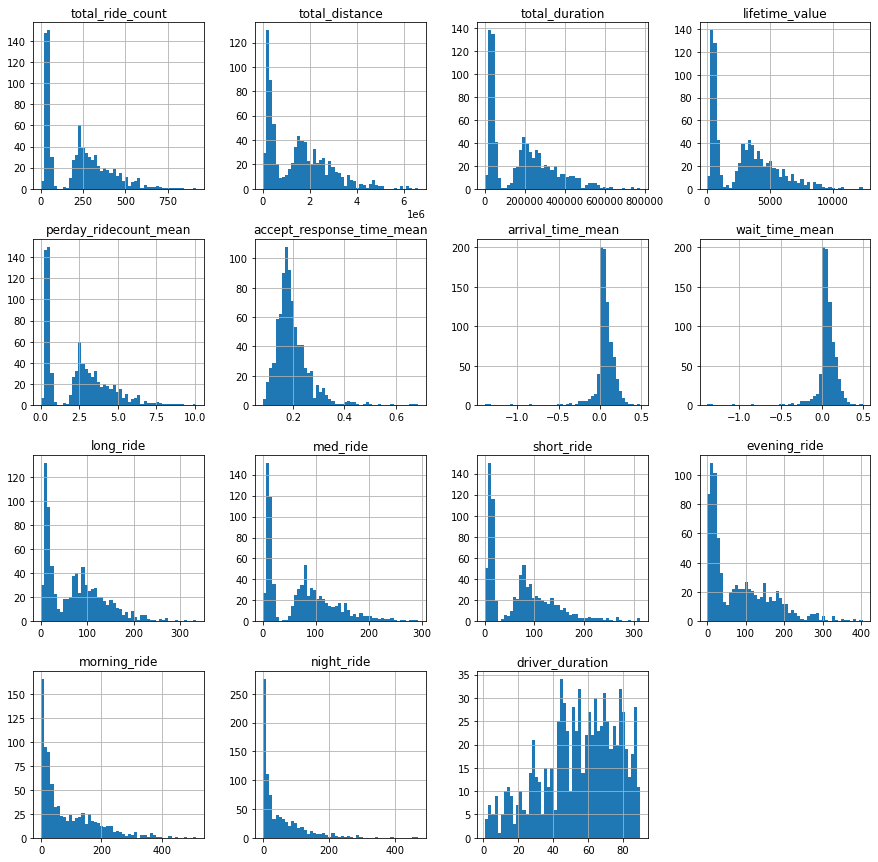

In [27]:
driver_data.hist(bins=50, figsize=(15,15))
plt.show()

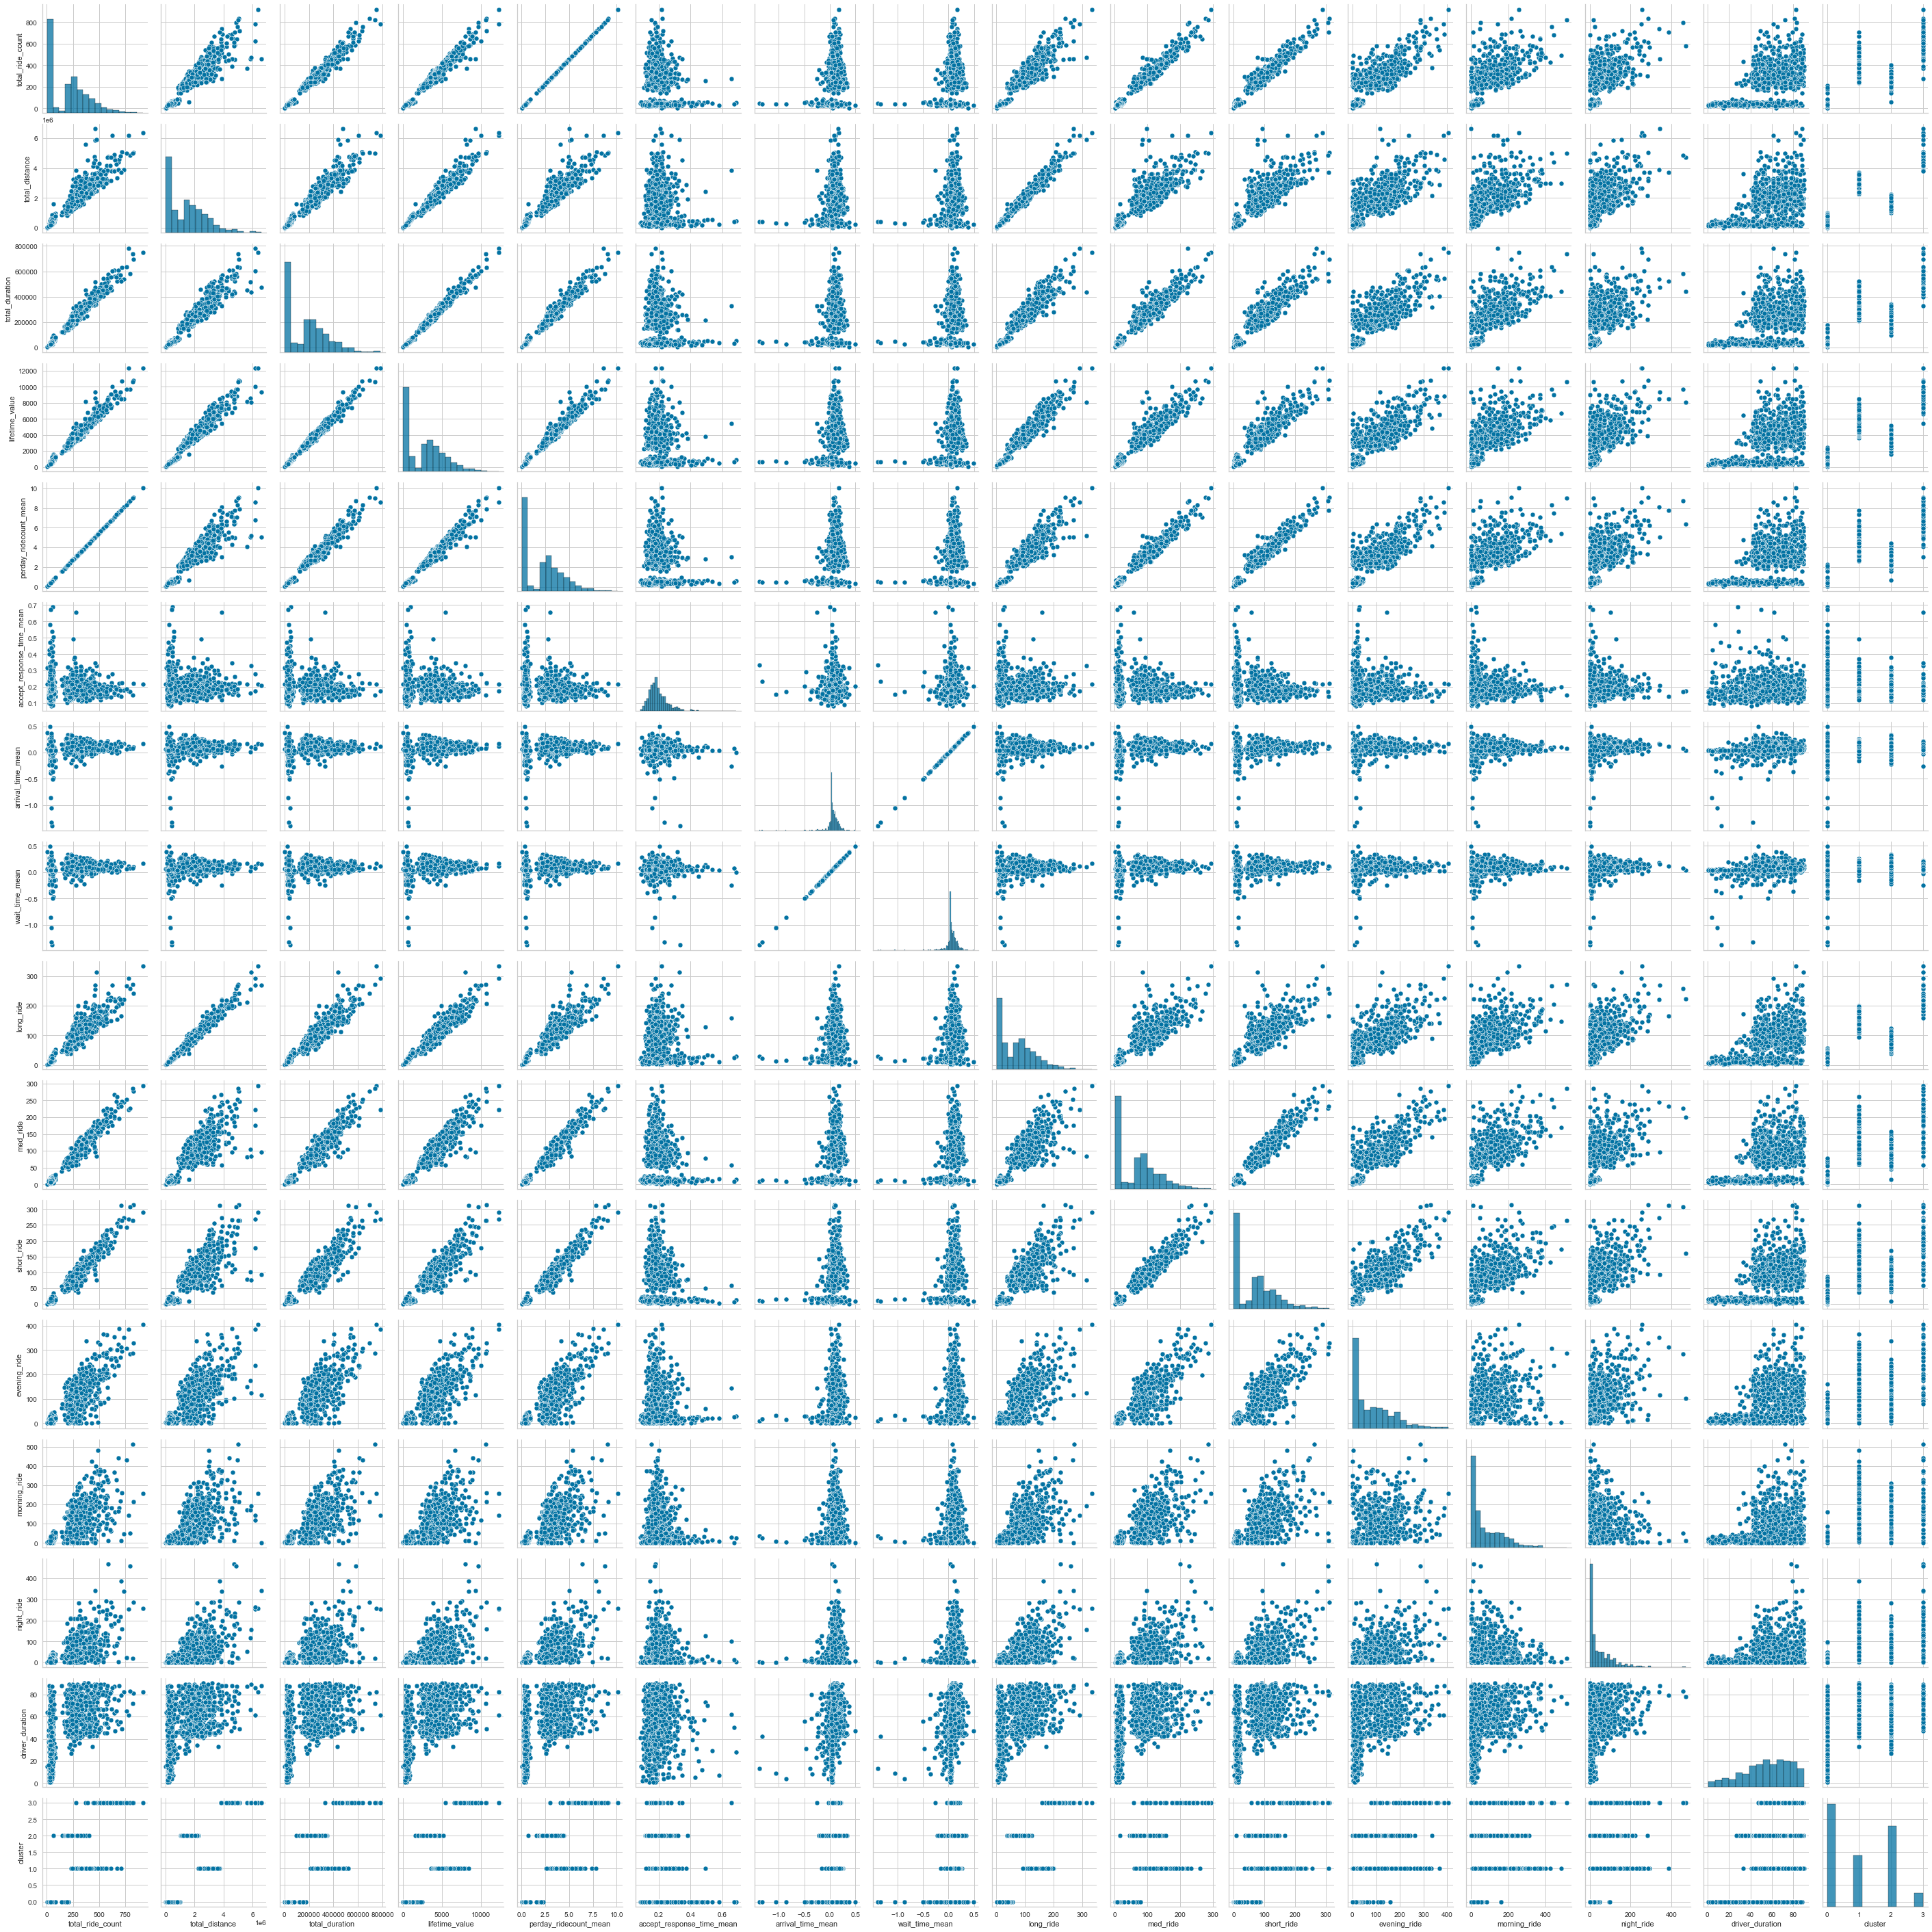

In [47]:
import seaborn as sns

# The function creates a matrix of plots, where each plot represents the relationship between two variables. 
# This can help to visually identify any correlations or patterns in the data, and we can see the relationship 
# between the total lifetime value and all variables, the relationship between all variables, 
# and the driver duration with Lyft.


sns.pairplot(driver_data)

## Question 2
What are the main factors that affect a driver's lifetime value?

<AxesSubplot:>

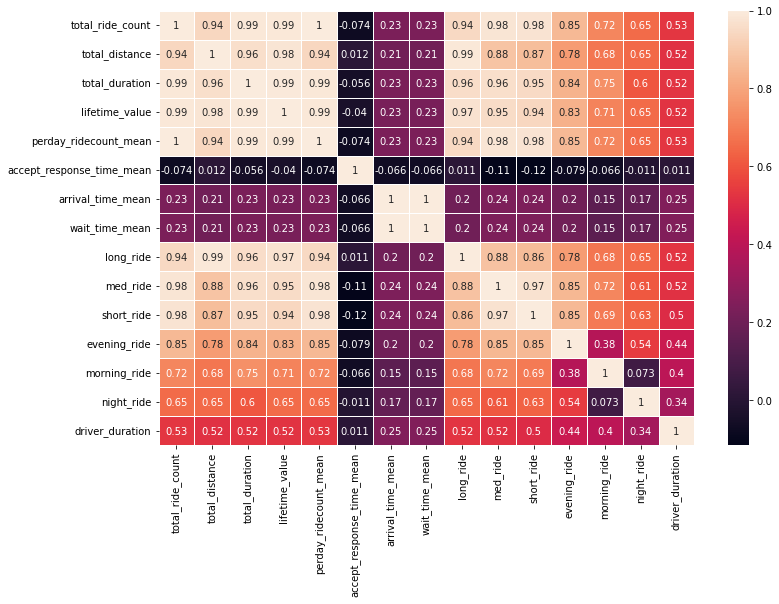

In [29]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(driver_data.corr(), annot = True, linewidths = 0.5)

In [30]:
(driver_data.corr()['lifetime_value']).sort_values(ascending = False)

lifetime_value               1.000000
total_duration               0.994194
total_ride_count             0.987069
perday_ridecount_mean        0.987069
total_distance               0.978453
long_ride                    0.971439
med_ride                     0.954142
short_ride                   0.940301
evening_ride                 0.833416
morning_ride                 0.710687
night_ride                   0.652164
driver_duration              0.523453
arrival_time_mean            0.226387
wait_time_mean               0.226387
accept_response_time_mean   -0.040457
Name: lifetime_value, dtype: float64

As we can see the target variable has a negative correlation between 'accept_response_time_mean'. Also,  the target variable has a lower positive correlation between 'arrival_time_mean' and 'wait_time_mean'.

## Question 3
What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Lyft?

Text(0, 0.5, 'Number of drivers')

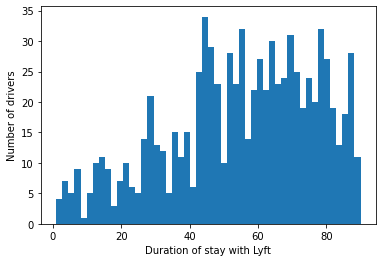

In [31]:
driver_data['driver_duration'].plot.hist(bins = 50)
plt.xlabel('Duration of stay with Lyft')
plt.ylabel('Number of drivers')

The graph is a histogram, which shows how many drivers have worked for different lengths of time. The code sets the labels for the x-axis (the length of time) and the y-axis (the number of drivers) and then displays the graph.

In [32]:
driver_data['driver_duration'].describe()

count    837.000000
mean      55.075269
std       21.721934
min        1.000000
25%       42.000000
50%       57.000000
75%       73.000000
max       90.000000
Name: driver_duration, dtype: float64

After seeing these results we can say the average projected lifetime of a driver is around 55 days.

## Question 4
Do all drivers act alike? Are there specific segments of drivers that generate more value for Lyft than the average driver?

To answer this question we will do a segmentation model using K-Means Clustering, to help us to know if all drivers act alike or not, and of there specific segments of drivers that generate more value for Lyft than the average driver or not.

We use KElbowVisualizer to determine the optimal number of clusters for a K-Means Clustering model. The visualization helps to select the number of clusters by finding the "elbow" point in the plot of the explained variance as a function of the number of clusters. The "elbow" point represents the trade-off between simplicity and the explained variance; the optimal number of clusters is typically chosen at the elbow point, which is the point of diminishing returns.

The KElbowVisualizer fits the KMeans model on the input data (driver_data after dropping the driver_id column) and plots the explained variance for different values of k (number of clusters), ranging from 2 to 12.

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings

warnings.filterwarnings('ignore')

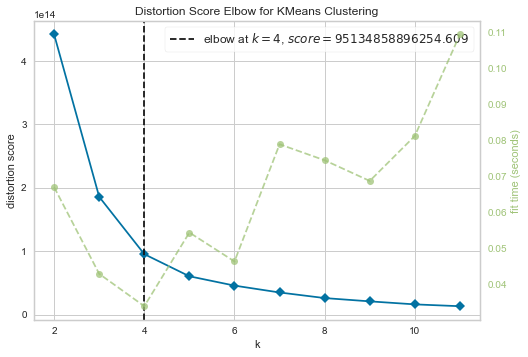

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans(random_state = 42)

visualizer = KElbowVisualizer(model, k = (2,12))

visualizer.fit(driver_data.drop(['driver_id'], axis = 1))

visualizer.show()

Our best k is 4, so we will use it to segment the data.

In [37]:
k_means = KMeans(n_clusters = visualizer.elbow_value_, random_state = 42)

k_means.fit(driver_data.drop(['driver_id'], axis = 1))

KMeans(n_clusters=4, random_state=42)

We will plot some distribution to observe the differences between clusters.

Text(0, 0.5, 'Number Of Drivers')

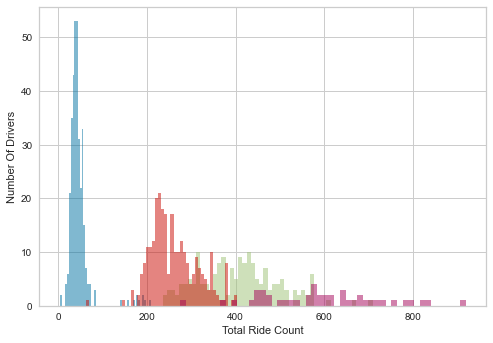

In [38]:
driver_data['cluster'] = k_means.labels_

driver_data.groupby('cluster')['total_ride_count'].plot.hist(bins = 50, alpha = 0.5)

plt.xlabel('Total Ride Count')

plt.ylabel('Number Of Drivers')

Text(0, 0.5, 'Number Of Drivers')

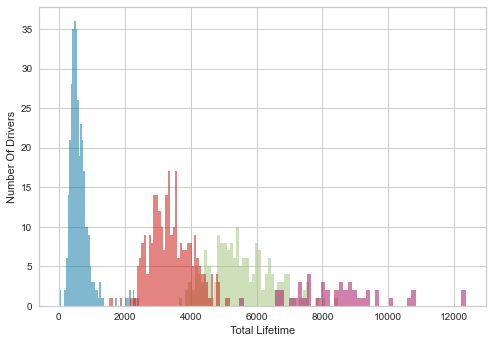

In [39]:
driver_data.groupby('cluster')['lifetime_value'].plot.hist(bins = 50, alpha = 0.5)

plt.xlabel('Total Lifetime')

plt.ylabel('Number Of Drivers')

Text(0, 0.5, 'Number Of Drivers')

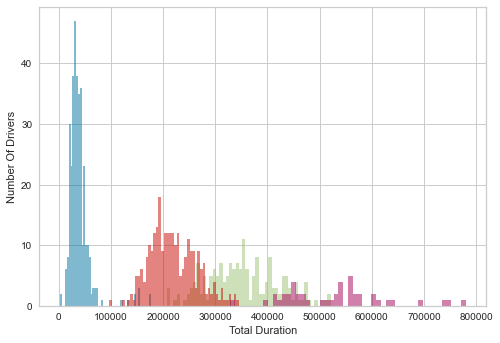

In [40]:
driver_data.groupby('cluster')['total_duration'].plot.hist(bins = 50, alpha = 0.5)

plt.xlabel('Total Duration')

plt.ylabel('Number Of Drivers')

Text(0, 0.5, 'Number Of Drivers')

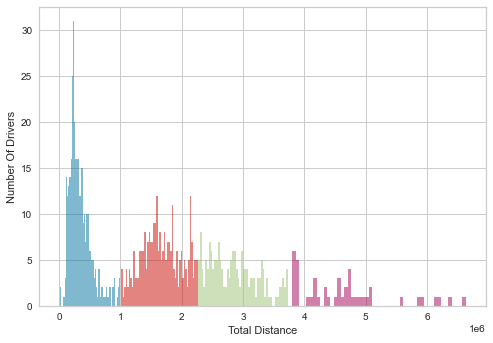

In [41]:
driver_data.groupby('cluster')['total_distance'].plot.hist(bins = 50, alpha = 0.5)

plt.xlabel('Total Distance')

plt.ylabel('Number Of Drivers')

Text(0, 0.5, 'Number Of Drivers')

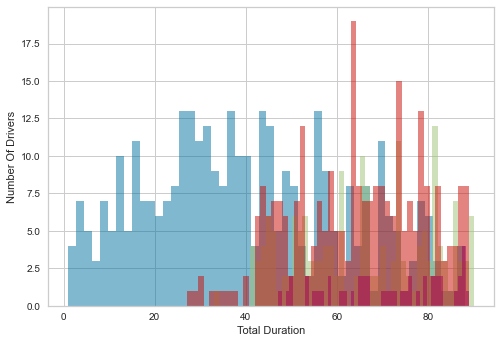

In [42]:
driver_data.groupby('cluster')['driver_duration'].plot.hist(bins = 50, alpha = 0.5)

plt.xlabel('Total Duration')

plt.ylabel('Number Of Drivers')

In [43]:
grouped_data = driver_data.groupby('cluster')['lifetime_value','med_ride', 'perday_ridecount_mean', 'total_ride_count', 'short_ride',
       'total_duration', 'total_distance', 'long_ride', 'evening_ride',
       'night_ride', 'morning_ride', 'driver_duration', 'wait_time_mean'].agg('mean')

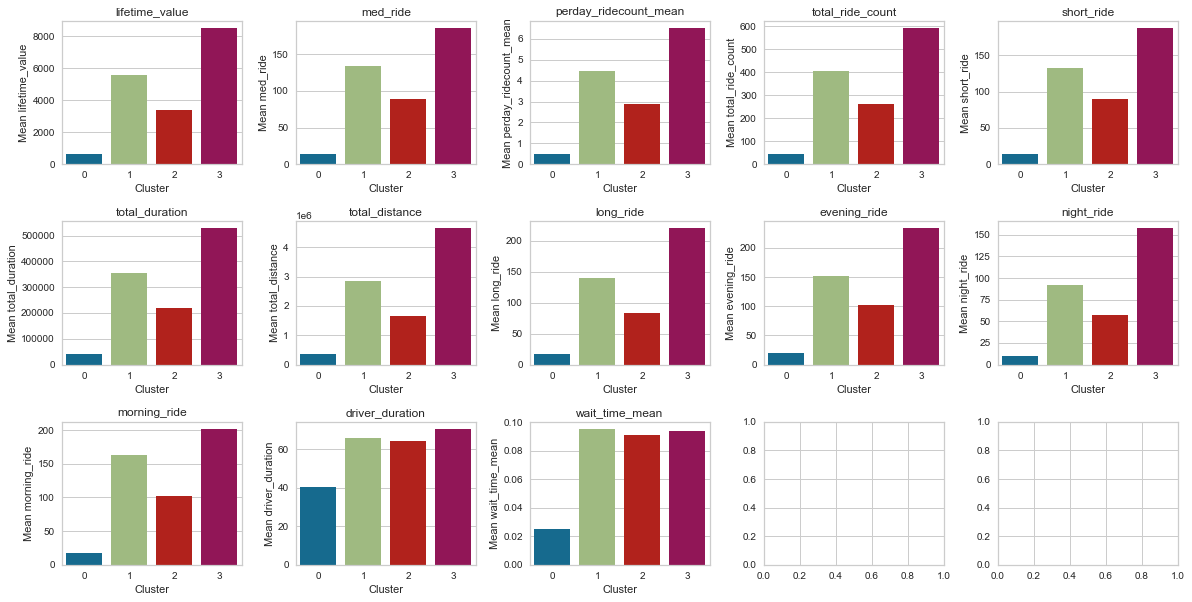

In [46]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

for i, column in enumerate(grouped_data.columns):
    
    sns.barplot(x = grouped_data.index, y = grouped_data[column], ax = axes[i // 5, i % 5])
    
    axes[i//5, i%5].set_title(column)
    
    axes[i//5, i%5].set_xlabel('Cluster')
    
    axes[i//5, i%5].set_ylabel('Mean ' + column)

After seeing these plots we can define clusters as bad drivers, fair drivers, good drivers, and excellent drivers:

* **Cluster 0 is Bad drivers:** This cluster has drivers with relatively low total lifetime value, low total ride count, and low total duration and distance. They may have issues with customer service, low demand for their services, or low fares.


* **Cluster 2 is Fair drivers:** This cluster has drivers with moderate total lifetime value, ride count, duration, and distance. They may not have a high demand for their services, but they also do not have any major issues that impact their earnings.


* **Cluster 1 is Good drivers:** This cluster has drivers with higher total lifetime value, higher ride count, and higher total duration and distance than the first two clusters. They may have a consistent demand for their services and a good reputation, leading to higher earnings.


* **Cluster 3 is Excellent drivers:** This cluster has drivers with the highest total lifetime value, ride count, and total duration and distance. These drivers are likely the most in demand and have a good reputation for providing excellent service to their customers, leading to high earnings.

## Question 5
What actionable recommendations are there for the business?

Here are a few actionable recommendations based on the clustering analysis performed on the driver information data:

* **Focus on retaining good and excellent drivers:** The business should focus on retaining the drivers who belong to the good and excellent clusters as they bring in more revenue and have more frequent rides compared to other drivers.


* **Target improvement of fair drivers:** The business should target to improve the performance of fair drivers, to convert them into good or excellent drivers.


* **Identify and address issues faced by bad drivers:** The business should identify and address the issues faced by the bad drivers, such as low earnings, low ride frequency, and low ride duration, to improve their performance.


* **Personalized incentives and training:** The business can offer personalized incentives and training to drivers based on their performance clusters to further improve their performance.


* **Use clustering results for dynamic pricing:** The clustering results can be used for dynamic pricing, where prices can be adjusted based on the supply and demand of drivers in a particular area.


* **Monitor performance regularly:** The business should regularly monitor the performance of drivers and reassess them based on the clustering results to ensure that they are being properly targeted with the appropriate incentives and support.